#Importing Libararies

In [57]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import torchvision.models as models
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


#Importing datasets from kaggle

In [29]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Importing MDMFR dataset for training our model

In [30]:
!kaggle datasets download -d haleytriem/mdmfr-dataset

mdmfr-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
!unzip -q /content/mdmfr-dataset.zip

replace Face Mask Dataset/Test/WithMask/1163.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Data preprocessing

In [32]:

# Define the directory paths
train_dir = "/content/Face Mask Dataset/Train"
test_dir = "/content/Face Mask Dataset/Test"
valid_dir = "/content/Face Mask Dataset/Validation"

# Define normalization transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing images to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

# Create datasets
train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)
valid_data = datasets.ImageFolder(valid_dir, transform=transform)

# Define batch size
batch_size = 64

# Create data loaders
train_loader1 = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader1 = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
valid_loader1 = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False)


#sample images from first dataset(MDMFR)

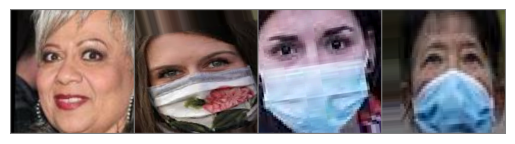

    1     0     0     0


In [58]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

data_iter = iter(train_loader1)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s' % labels[j].item() for j in range(4)))

#Importing second dataset from kaggle for testing

In [6]:
!kaggle datasets download -d ashiqurrahmantanzil/facemask-dataset

 99% 1.24G/1.26G [00:14<00:00, 97.4MB/s]
100% 1.26G/1.26G [00:14<00:00, 93.6MB/s]


In [7]:
!unzip -q /content/facemask-dataset.zip

#Data preprocessing on second dataset

In [33]:

# Set the path to your dataset
dataset_path = "/content/dataset_final"

# Define the directories for training, testing, and validation data
train_dir = "/content/trainn"
test_dir = "/content/testt"
val_dir = "/content/vali"

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Define the classes
classes = ["with_mask","without_mask"]

# Define the percentage split for train, test, and validation
train_split = 0.7
test_split = 0.15
val_split = 0.15

for class_name in classes:

    images = os.listdir(os.path.join(dataset_path, class_name))

    train_images, test_val_images = train_test_split(images, test_size=(test_split + val_split), random_state=42)
    test_images, val_images = train_test_split(test_val_images, test_size=val_split/(test_split + val_split), random_state=42)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)


    for img in train_images:
        shutil.copy(os.path.join(dataset_path, class_name, img), os.path.join(train_dir, class_name))
    for img in test_images:
        shutil.copy(os.path.join(dataset_path, class_name, img), os.path.join(test_dir, class_name))
    for img in val_images:
        shutil.copy(os.path.join(dataset_path, class_name, img), os.path.join(val_dir, class_name))



In [34]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root="/content/trainn", transform=transform)
test_dataset = ImageFolder(root="/content/testt", transform=transform)
val_dataset = ImageFolder(root="/content/vali", transform=transform)

train_load= DataLoader(train_dataset, batch_size=32, shuffle=True)
test_load = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_load = DataLoader(val_dataset, batch_size=32, shuffle=False)

#sample images from third dataset

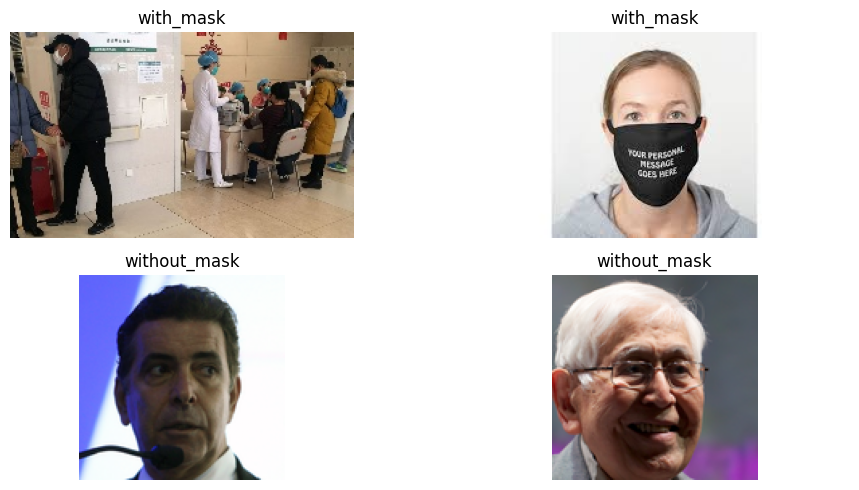

In [51]:
plt.figure(figsize=(10, 5))

for i, class_name in enumerate(classes):

    image_files = os.listdir(os.path.join(dataset_path, class_name))
    random_images = random.sample(image_files, 2)

    for j, image in enumerate(random_images):
        plt.subplot(2, 2, i*2 + j + 1)
        img_path = os.path.join(dataset_path, class_name, image)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

#Importing third dataset for testing

In [10]:
!kaggle datasets download -d muhammadahsan026/facemask-dataset-covid1910k-images-2-folders

100% 337M/337M [00:03<00:00, 92.7MB/s]
100% 337M/337M [00:03<00:00, 99.1MB/s]


In [11]:
!unzip -q /content/facemask-dataset-covid1910k-images-2-folders.zip

#Data preprocessing on third dataset

In [52]:
dataset_path = "/content/FaceMask-Dataset-covid-19"
train_dir = "/content/trainnn"
test_dir = "/content/testtt"
val_dir = "/content/valii"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
classes = ["with_mask","without_mask"]

train_split = 0.7
test_split = 0.15
val_split = 0.15

for class_name in classes:

    images = os.listdir(os.path.join(dataset_path, class_name))

    train_images, test_val_images = train_test_split(images, test_size=(test_split + val_split), random_state=42)
    test_images, val_images = train_test_split(test_val_images, test_size=val_split/(test_split + val_split), random_state=42)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    for img in train_images:
        shutil.copy(os.path.join(dataset_path, class_name, img), os.path.join(train_dir, class_name))
    for img in test_images:
        shutil.copy(os.path.join(dataset_path, class_name, img), os.path.join(test_dir, class_name))
    for img in val_images:
        shutil.copy(os.path.join(dataset_path, class_name, img), os.path.join(val_dir, class_name))


In [53]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = ImageFolder(root="/content/trainnn", transform=transform)
test_dataset = ImageFolder(root="/content/testtt", transform=transform)
val_dataset = ImageFolder(root="/content/valii", transform=transform)

train_l= DataLoader(train_dataset, batch_size=32, shuffle=True)
test_l = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_l = DataLoader(val_dataset, batch_size=32, shuffle=False)

#sample images from third dataset

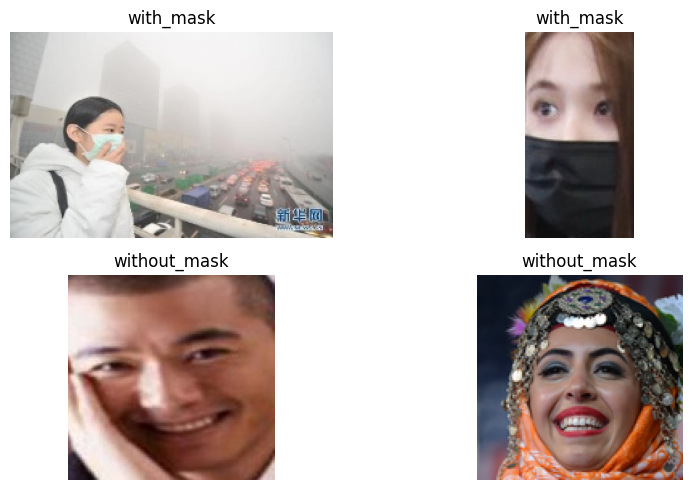

In [54]:
plt.figure(figsize=(10, 5))

for i, class_name in enumerate(classes):
    image_files = os.listdir(os.path.join(dataset_path, class_name))
    random_images = random.sample(image_files, 2)

    for j, image in enumerate(random_images):
        plt.subplot(2, 2, i*2 + j + 1)
        img_path = os.path.join(dataset_path, class_name, image)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Defining function to evalute the model

In [36]:
def evaluate(model, criterion, data_loader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return total_loss / len(data_loader.dataset), (100 * correct / total)


#Defining function for recall,precision and F1 score

In [37]:
def evaluate_metrics(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return precision, recall, f1

#Defining simple model
We have used 6 convolutional layers and after every convolutional we used max pooling and at last we used 4 fully conneted layers and used dropout to avoid overfitting


In [38]:
class Model1(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 128, kernel_size=3, stride=4, padding=0)
        self.leakyrelu = nn.LeakyReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv2 = nn.Conv2d(128, 512, kernel_size=3, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv3 = nn.Conv2d(512, 384, kernel_size=3, stride=1, padding=1)
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)

        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)

        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.maxpool4 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        # Calculate the output size after convolutions
        self.fc_input_size = self._get_conv_output_size((input_channels, 224, 224))

        # Define fully connected layers
        self.fc1 = nn.Linear(self.fc_input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, num_classes)

        self.dropout = nn.Dropout(p=0.5)

    def _get_conv_output_size(self, shape):
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))
        output_feat = self._forward_features(input)
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size

    def _forward_features(self, x):
        x = self.leakyrelu(self.conv1(x))
        x = self.maxpool1(x)

        x = self.leakyrelu(self.conv2(x))
        x = self.maxpool2(x)

        x = self.leakyrelu(self.conv3(x))
        x = self.maxpool3(x)

        x = self.leakyrelu(self.conv4(x))

        x = self.leakyrelu(self.conv5(x))

        x = self.leakyrelu(self.conv6(x))
        x = self.maxpool4(x)

        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)

        x = self.dropout(self.leakyrelu(self.fc1(x)))
        x = self.dropout(self.leakyrelu(self.fc2(x)))
        x = self.dropout(self.leakyrelu(self.fc3(x)))
        x = self.fc4(x)
        return x


#defining the optimizers and loss function
We have used adam as a optimiser and cross entropy loss as loss function

In [ ]:
input_channels = 3
num_classes = len(train_data.classes)

model1 = Model1(input_channels, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

#training of Model1

In [40]:

# Training loop
def train(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accuracy = (100 * correct / total)
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.2f}%')

        val_loss, val_accuracy = evaluate(model, criterion, val_loader)
        val_losses.append(val_loss)
        print(f'Validation Loss: {val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses


train_losses, val_losses = train(model1, criterion, optimizer, train_loader1, valid_loader1, num_epochs=10)



Epoch 1/10, Training Loss: 3.3672, Training Accuracy: 52.32%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 2/10, Training Loss: 3.3082, Training Accuracy: 51.82%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 3/10, Training Loss: 3.3746, Training Accuracy: 51.45%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 4/10, Training Loss: 3.3999, Training Accuracy: 51.97%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 5/10, Training Loss: 3.2768, Training Accuracy: 52.73%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 6/10, Training Loss: 3.3640, Training Accuracy: 52.41%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 7/10, Training Loss: 3.3739, Training Accuracy: 53.09%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 8/10, Training Loss: 3.4571, Training Accuracy: 51.57%
Validation Loss: 0.5899, Validation Accuracy: 69.62%
Epoch 9/10, Training Loss: 3.4716, Training Accuracy: 52.85%
Validation Loss: 0.5899, Va

#Testing model1 on first datset and plot training ,validation loss

Test Loss: 0.5773, Test Accuracy: 72.48%


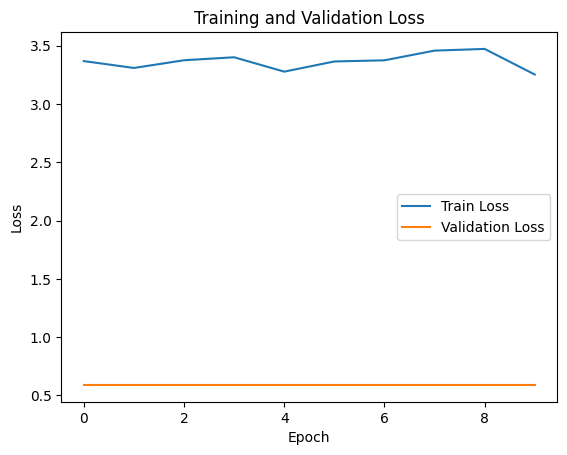

In [41]:

test_loss, test_accuracy = evaluate(model1, criterion, test_loader1)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#print precision,recall and F1 score using Model1

In [42]:
precision, recall, f1 = evaluate_metrics(model1, test_loader1)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7363712995885238
Recall: 0.7247983870967742
F1-score: 0.7225669732408796


#Defining Modified model(final model)
we have modified our model1 by introducing batch normalization
we have used Batch normaliazation after every convolutional layers beacuse 1.Batch normalization reduces the internal covariate shift by fixing the means and variances of layer inputs. This ensures that the model remains stable and doesn't undergo drastic changes in parameter updates during training.
2.It allows for faster convergence during training, which means you need fewer epochs to train the model effectively.


In [43]:
class ModifiedModel(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ModifiedModel, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 128, kernel_size=3, stride=4, padding=0)
        self.bn1 = nn.BatchNorm2d(128)
        self.leakyrelu = nn.LeakyReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv2 = nn.Conv2d(128, 512, kernel_size=3, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(512)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv3 = nn.Conv2d(512, 384, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(384)
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)

        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)

        # Calculate the output size after convolutions
        self.fc_input_size = self._get_conv_output_size((input_channels, 224, 224))

        # Define fully connected layers
        self.fc1 = nn.Linear(self.fc_input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, num_classes)

        self.dropout = nn.Dropout(p=0.5)

    def _get_conv_output_size(self, shape):
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))
        output_feat = self._forward_features(input)
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size

    def _forward_features(self, x):
        x = self.leakyrelu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)

        x = self.leakyrelu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)

        x = self.leakyrelu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)

        x = self.leakyrelu(self.bn4(self.conv4(x)))

        x = self.leakyrelu(self.bn5(self.conv5(x)))

        x = self.leakyrelu(self.bn6(self.conv6(x)))
        x = self.maxpool4(x)

        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)

        x = self.dropout(self.leakyrelu(self.fc1(x)))
        x = self.dropout(self.leakyrelu(self.fc2(x)))
        x = self.dropout(self.leakyrelu(self.fc3(x)))
        x = self.fc4(x)
        return x




#defining the optimizers and loss function
We have used adam as a optimiser and cross entropy loss as loss function

In [ ]:

input_channels = 3
num_classes = len(train_data.classes)

modified_model = ModifiedModel(input_channels, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model.parameters(), lr=0.01)


#Training of our final model

In [44]:

torch.manual_seed(42)
train_data = torch.utils.data.random_split(train_data, [len(train_data)])[0]
train_loader1 = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

def train(model, criterion, optimizer, train_loader, val_loader, num_epochs=10, validation_frequency=30):
    train_losses = []
    val_losses = []
    iterations_per_epoch = len(train_loader)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(train_loader, 1):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


            if i % validation_frequency == 0:
                train_loss = running_loss / (validation_frequency * batch_size)
                train_losses.append(train_loss)
                train_accuracy = (100 * correct / total)
                print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i}/{iterations_per_epoch}, '
                      f'Training Loss: {train_loss:.4f}, '
                      f'Training Accuracy: {train_accuracy:.2f}%')

                running_loss = 0.0
                correct = 0
                total = 0


        val_loss, val_accuracy = evaluate(model, criterion, val_loader)
        val_losses.append(val_loss)
        print(f'End of Epoch {epoch+1}/{num_epochs}, '
              f'Validation Loss: {val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses


train_losses, val_losses = train(modified_model, criterion, optimizer, train_loader1, valid_loader1,
                                 num_epochs=10, validation_frequency=30)


Epoch 1/10, Iteration 30/158, Training Loss: 0.5350, Training Accuracy: 88.75%
Epoch 1/10, Iteration 60/158, Training Loss: 0.3266, Training Accuracy: 92.14%
Epoch 1/10, Iteration 90/158, Training Loss: 0.3076, Training Accuracy: 89.38%
Epoch 1/10, Iteration 120/158, Training Loss: 0.2221, Training Accuracy: 92.55%
Epoch 1/10, Iteration 150/158, Training Loss: 0.1930, Training Accuracy: 94.27%
End of Epoch 1/10, Validation Loss: 0.1583, Validation Accuracy: 95.88%
Epoch 2/10, Iteration 30/158, Training Loss: 0.1513, Training Accuracy: 94.90%
Epoch 2/10, Iteration 60/158, Training Loss: 0.1202, Training Accuracy: 96.20%
Epoch 2/10, Iteration 90/158, Training Loss: 0.1309, Training Accuracy: 96.25%
Epoch 2/10, Iteration 120/158, Training Loss: 0.1236, Training Accuracy: 96.98%
Epoch 2/10, Iteration 150/158, Training Loss: 0.0952, Training Accuracy: 96.77%
End of Epoch 2/10, Validation Loss: 0.1003, Validation Accuracy: 96.00%
Epoch 3/10, Iteration 30/158, Training Loss: 0.1029, Training 

#Testing modified model on first datset and plot training ,validation loss

Test Loss: 0.1109, Test Accuracy: 96.17%


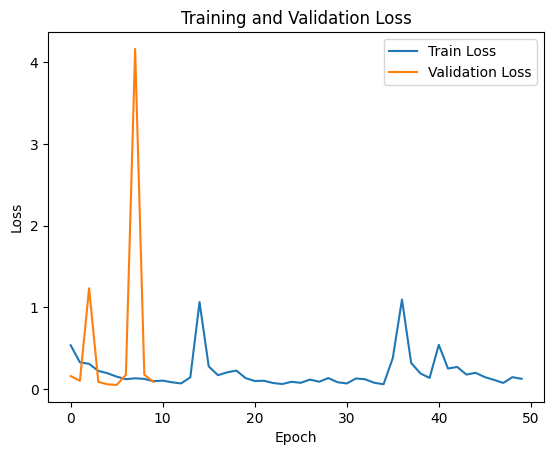

In [45]:

test_loss, test_accuracy = evaluate(modified_model, criterion, test_loader1)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plot losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#print precision,recall and F1 score on first dataset(MDMFR)

In [46]:
precision, recall, f1 = evaluate_metrics(modified_model, test_loader1)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9633341659866058
Recall: 0.9616935483870968
F1-score: 0.9616279423092708


#Testing modified model on second dataset

In [47]:
test_loss, test_accuracy = evaluate(modified_model, criterion, test_load)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 7.4077, Test Accuracy: 78.56%


#print precision,recall and F1 score on second dataset

In [48]:
precision, recall, f1 = evaluate_metrics(modified_model, test_load)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8371953141969959
Recall: 0.7856179775280899
F1-score: 0.7704838718243212


#Testing modified model on third dataset

In [49]:
test_loss, test_accuracy = evaluate(modified_model, criterion, test_l)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Loss: 7.9247, Test Accuracy: 70.13%


#print precision,recall and F1 score on third dataset

In [50]:
precision, recall, f1 = evaluate_metrics(modified_model, test_l)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7959051431318653
Recall: 0.7013333333333334
F1-score: 0.6753974449141736
